# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [4]:
import numpy as np
from glob import glob
import os

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


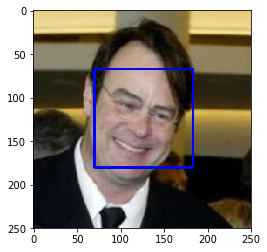

In [5]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [6]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
98 percent of the human files had a human face detected.
17 percent of the dog files had a human face detected.

In [7]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
faces_detected_human_files = 0
faces_detected_dog_files = 0

for human in human_files_short:

    if (face_detector(human)):
        faces_detected_human_files += 1

for dog in dog_files_short:
    if(face_detector(dog)):
        faces_detected_dog_files += 1
    
print('%d images of humans were detected.' % faces_detected_human_files)

print('%d images of humans were detected in the dog files! :)' % faces_detected_dog_files)


98 images of humans were detected.
17 images of humans were detected in the dog files! :)


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [8]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [10]:
from PIL import Image
import torchvision.transforms as transforms

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    VGG16.eval()
    img = Image.open(img_path)
    transform = transforms.Compose([transforms.Resize(224), transforms.CenterCrop(224),
                                    transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])
    tensor = transform(img)
    
    tensor = tensor.unsqueeze(0)
    
    if use_cuda:
        tensor = tensor.cuda()
    
    
    classification = VGG16(tensor)
    
    classification_index = torch.argmax(classification, 1).item()
    
    return classification_index # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [11]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## Get the index of the picture classification
    index = VGG16_predict(img_path)
    
    #If it is in the dog range, return True
    if (index >= 151 and index <= 269):
        
        return True
    
    else:
        
        return False
    
    

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog? 

__Answer:__ No dogs were detected in the human files, and all of the dog files had dogs in them.


In [12]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

faces_detected_human_files = 0
faces_detected_dog_files = 0

for human in human_files_short:

    if (dog_detector(human)):
        faces_detected_human_files += 1

for dog in dog_files_short:
    if(dog_detector(dog)):
        faces_detected_dog_files += 1
    
print('%d images of dogs were detected in the human files.' % faces_detected_human_files)

print('%d images of dogs were detected in the dog files.' % faces_detected_dog_files)


0 images of dogs were detected in the human files.
100 images of dogs were detected in the dog files.


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [22]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.


from PIL import Image
import torchvision.transforms as transforms

InceptionV3 = models.inception_v3(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    InceptionV3 = InceptionV3.cuda()
InceptionV3.eval()
    

def InceptionV3_predict(img_path):

    img = Image.open(img_path)
    transform = transforms.Compose([transforms.Resize(299), transforms.CenterCrop(299), transforms.ToTensor(),
                                    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])
    tensor = transform(img)
    
    tensor = tensor.unsqueeze(0)
    
    if use_cuda:
        tensor = tensor.cuda()
    
    classification = InceptionV3(tensor)
    
    classification_index = torch.argmax(classification, 1).item()
    
    return classification_index # predicted class index

### returns "True" if a dog is detected in the image stored at img_path
def dog_detector_inception(img_path):
    ## Get the index of the picture classification
    index = InceptionV3_predict(img_path)
    
    #If it is in the dog range, return True
    if (index >= 151 and index <= 268):
        
        return True
    
    else:
        
        return False
    

    ### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

faces_detected_human_files = 0
faces_detected_dog_files = 0

for human in human_files_short:

    if (dog_detector_inception(human)):
        faces_detected_human_files += 1

for dog in dog_files_short:
    if(dog_detector_inception(dog)):
        faces_detected_dog_files += 1
    
print('%d images of dogs were detected in the human files.' % faces_detected_human_files)

print('%d images of dogs were detected in the dog files.' % faces_detected_dog_files)

###All of the dogs were detected, but one dog was detected in the human files.  They both seem to be very accurate.
###I will use the more accurate VGG16 model for my transfer learning project.


Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.torch/models/inception_v3_google-1a9a5a14.pth
100%|██████████| 108857766/108857766 [00:01<00:00, 84440458.58it/s]


1 images of dogs were detected in the human files.
100 images of dogs were detected in the dog files.


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

133


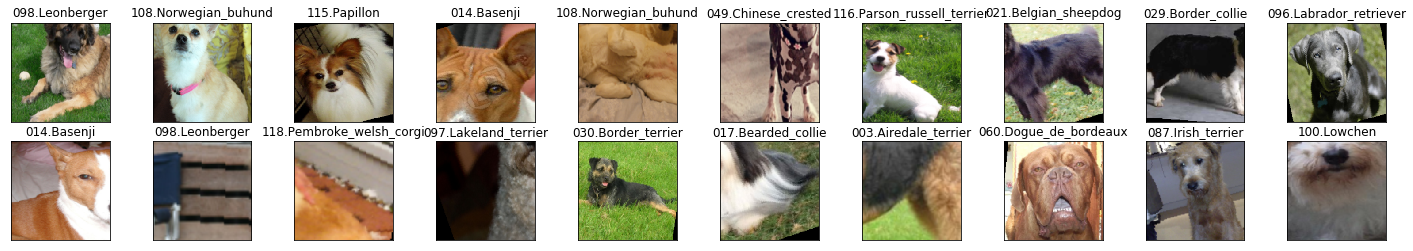

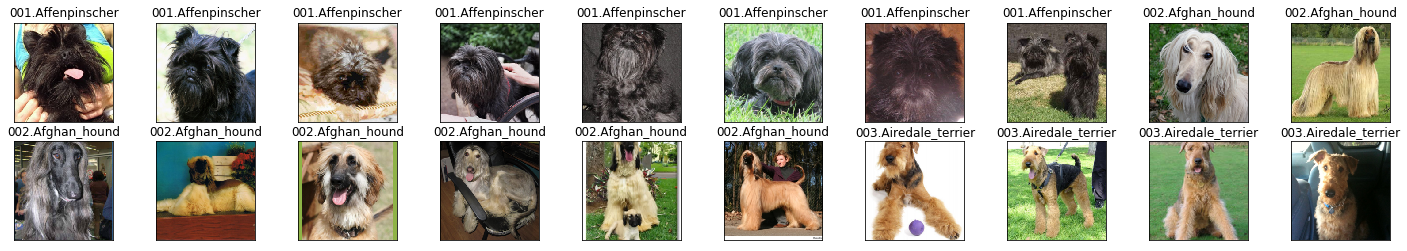

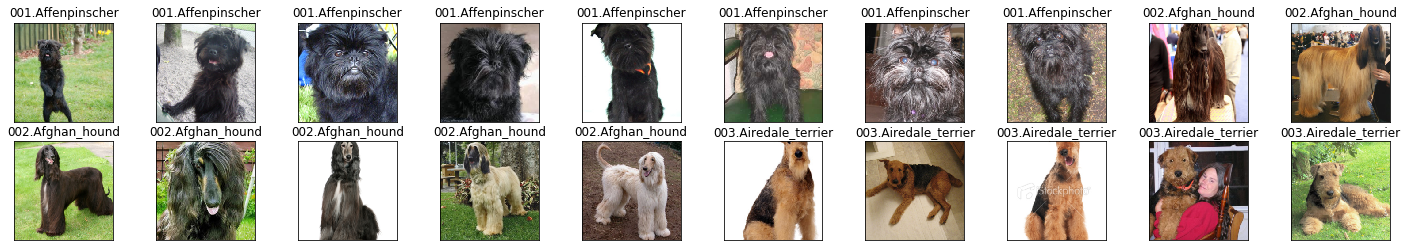

In [13]:
import os
import numpy as np
import torch
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True


### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

num_workers = 0
batch_size = 20

#Transform for the test and validation data
transform = transforms.Compose([transforms.Resize(224), transforms.CenterCrop(224),
                                    transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

#Augmented transform for the test data set
transform_train = transforms.Compose([transforms.Resize(224), transforms.CenterCrop(224),
                                      transforms.RandomRotation(25), transforms.RandomHorizontalFlip(),
                                      transforms.RandomResizedCrop(224),
                                      transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

train_data = datasets.ImageFolder('/data/dog_images/train', transform=transform_train)
test_data = datasets.ImageFolder('/data/dog_images/test', transform=transform)
validation_data = datasets.ImageFolder('/data/dog_images/valid', transform=transform)


train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    num_workers=num_workers, shuffle=True) 
validation_loader = torch.utils.data.DataLoader(validation_data, batch_size=batch_size, 
    num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

loaders_scratch = {'train': train_loader, 'test': test_loader, 'valid': validation_loader}

num_breeds = len(test_data.classes)
print (num_breeds)

#Visualize samples of the data in each set
def visualize(loader, data):
    new_iter = iter(loader)

    images, labels = next (new_iter)
    images = images.numpy()
    breeds = data.classes
    fig = plt.figure(figsize=(25, 4))
    
    for index in np.arange(20):
        ax = fig.add_subplot(2, 20/2, index+1, xticks=[], yticks=[])
        image = images[index]
        image = image / 2 + 0.5
        plt.imshow(np.transpose(image, (1, 2, 0)))
        ax.set_title(breeds[labels[index]])

visualize(train_loader, train_data)
visualize(test_loader, test_data)
visualize(validation_loader, validation_data)


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:  My code resizes the images to 224 with a resize and center crop.  I picked 224 as the size because that is the size that is same size my transfer learning project will use with the VGG16 model.  I will be able to compare the difference with the same sized images.  I will augment my training images with flips, rotations, and random resized crops to help my network generalize and not overfit the data.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [10]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Convolutional layers
        #Image starts at 224 x 224
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        #Image is 112 x 112
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        #Image is 56 x 56
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        #Image is 28 x 28
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1)
        #Image is 14 x 14
        self.conv5 = nn.Conv2d(128, 256, 3, padding=1)

        ##Pooling layer
        self.pool = nn.MaxPool2d(2,2)
        
        ##Batch normalization
        self.bn1 = nn.BatchNorm2d(16)
        self.bn2 = nn.BatchNorm2d(32)
        self.bn3 = nn.BatchNorm2d(64)
        self.bn4 = nn.BatchNorm2d(128)
        self.bn5 = nn.BatchNorm2d(256)
        
         
        ##Linear layers
        self.fc1 = nn.Linear(256 * 7 * 7, 2000)
        self.fc2 = nn.Linear(2000, 500)
        self.fc3 = nn.Linear(500, 133)
    
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = self.pool(F.relu(self.bn4(self.conv4(x))))
        x = self.pool(F.relu(self.bn5(self.conv5(x))))
        
        x = x.view(-1, 256 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        
        
        return x

# instantiate the CNN
model_scratch = Net()
print (model_scratch)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=12544, out_features=2000, bias=True)
  (fc2): Li

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ I am using five convolutional layers to try to recognize the complex patterns of the dog breeds.  After each convolutional layer, I am using a batch normalization layer to help optimize the model and improve its performance.  Then, I am applying a relu function and a 2 x 2 pooling layer.  After the convolutional layers, I flatten the tensor, then it goes through three linear layers.  I choose 2000 for the output to the first layer, and 500 as the output of the second layer, because these numbers were between the output of my convolutional layers (12544) and my ultimate output (133) for the number of breeds.  After reading questions from others about improving the accuracy of their networks, I decided not to use dropout layers, and found that it improved my network's accuracy.  I also used the Adam optimizer and found that it helped with accuracy.  

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [11]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()
### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.002)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [13]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # Initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # Initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # Move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## Find the loss and update the model parameters accordingly
            ## Record the average training loss
                        
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # Move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
        
        #train_loss = train_loss/(len(train_loader.dataset))
        #valid_loss = valid_loss/(len(valid_loader.dataset))
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if (valid_loss < valid_loss_min):
            print('Validation loss decreased. Saving model.')
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
    # return trained model
    return model

In [10]:
# train the model
model_scratch = train(30, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.973593 	Validation Loss: 4.792110
Validation loss decreased. Saving model.
Epoch: 2 	Training Loss: 4.722534 	Validation Loss: 4.622149
Validation loss decreased. Saving model.
Epoch: 3 	Training Loss: 4.625323 	Validation Loss: 4.632223
Epoch: 4 	Training Loss: 4.571743 	Validation Loss: 4.506828
Validation loss decreased. Saving model.
Epoch: 5 	Training Loss: 4.532513 	Validation Loss: 4.509782
Epoch: 6 	Training Loss: 4.488322 	Validation Loss: 4.475426
Validation loss decreased. Saving model.
Epoch: 7 	Training Loss: 4.458932 	Validation Loss: 4.388475
Validation loss decreased. Saving model.
Epoch: 8 	Training Loss: 4.426577 	Validation Loss: 4.434003
Epoch: 9 	Training Loss: 4.397769 	Validation Loss: 4.310979
Validation loss decreased. Saving model.
Epoch: 10 	Training Loss: 4.371301 	Validation Loss: 4.383762
Epoch: 11 	Training Loss: 4.349733 	Validation Loss: 4.353605
Epoch: 12 	Training Loss: 4.326149 	Validation Loss: 4.490880
Epoch: 13 	Training

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [14]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [12]:
# Load trained model again (doing this over multiple settings)
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

In [15]:

# call test function  

test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.599962


Test Accuracy: 13% (111/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [14]:
## TODO: Specify data loaders

loaders_transfer = {'train': train_loader, 'test': test_loader, 'valid': validation_loader}


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [15]:
#Load model and print output

import torchvision.models as models
import torch.nn as nn

model_transfer = models.vgg16(pretrained=True)

print (model_transfer)

print (use_cuda)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [16]:
#Freeze training for features layers
for param in model_transfer.features.parameters():
    param.requires_grad = False

#Change the final layer in the classifier to check dog breeds.

transfer_classifier = nn.Sequential(nn.Linear(4096, 2000),
                                   nn.ReLU(),
                                   nn.Dropout(.2),
                                   nn.Linear(2000, 1000),
                                   nn.ReLU(),
                                   nn.Dropout(.2),
                                   nn.Linear(1000, 133))

model_transfer.classifier[6] = transfer_classifier

if use_cuda:
    model_transfer = model_transfer.cuda()

print (model_transfer.classifier[6])

Sequential(
  (0): Linear(in_features=4096, out_features=2000, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2)
  (3): Linear(in_features=2000, out_features=1000, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.2)
  (6): Linear(in_features=1000, out_features=133, bias=True)
)


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ I chose to use the VGG16 model for this project.  I have kept the features layer (where the convolutional layers are) from training by setting its requires_grad to False, so only the layers in the classifier will train.  I changed the final layer in the classifier.  I changed the linear layer that accepts 4096 inputs to have 2000 outputs.  I am applying a relu function to this layer.  I have a secong layer that accepts the 2000 outputs from this layer and puts out 1000 ouputs.  Finally, I am adding a final layer that will take in the 1000 outputs from the previous layer as inputs and will produce 133 outputs for the 133 breeds that the network will need to classify. At first, a tried this with no dropout and only two layers, but I only got 48 percent accuracy.  Adding an additional layer to help give the netork room to learn and adding dropout to keep it from overfitting increased my accuracy to 70 percent. 


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [17]:
import torch.optim as optim

criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.classifier.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [42]:
# train the model
model_transfer = train(20, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# Load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 5.116184 	Validation Loss: 4.443142
Validation loss decreased. Saving model.
Epoch: 2 	Training Loss: 4.755535 	Validation Loss: 3.907347
Validation loss decreased. Saving model.
Epoch: 3 	Training Loss: 4.496794 	Validation Loss: 3.222591
Validation loss decreased. Saving model.
Epoch: 4 	Training Loss: 4.208018 	Validation Loss: 2.580286
Validation loss decreased. Saving model.
Epoch: 5 	Training Loss: 3.899148 	Validation Loss: 2.115633
Validation loss decreased. Saving model.
Epoch: 6 	Training Loss: 3.682635 	Validation Loss: 1.835919
Validation loss decreased. Saving model.
Epoch: 7 	Training Loss: 3.505833 	Validation Loss: 1.710653
Validation loss decreased. Saving model.
Epoch: 8 	Training Loss: 3.389260 	Validation Loss: 1.525969
Validation loss decreased. Saving model.
Epoch: 9 	Training Loss: 3.320445 	Validation Loss: 1.434572
Validation loss decreased. Saving model.
Epoch: 10 	Training Loss: 3.191045 	Validation Loss: 1.356112
Validation loss decr

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [21]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.174955


Test Accuracy: 70% (588/836)


In [18]:
#Load saved model
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [8]:
#Find how files are named
import os

list_dir = os.listdir('/data/dog_images/valid')

from pprint import pprint
pprint (list_dir)



['103.Mastiff',
 '059.Doberman_pinscher',
 '055.Curly-coated_retriever',
 '031.Borzoi',
 '024.Bichon_frise',
 '049.Chinese_crested',
 '067.Finnish_spitz',
 '130.Welsh_springer_spaniel',
 '019.Bedlington_terrier',
 '115.Papillon',
 '126.Saint_bernard',
 '013.Australian_terrier',
 '116.Parson_russell_terrier',
 '107.Norfolk_terrier',
 '133.Yorkshire_terrier',
 '032.Boston_terrier',
 '108.Norwegian_buhund',
 '028.Bluetick_coonhound',
 '066.Field_spaniel',
 '129.Tibetan_mastiff',
 '005.Alaskan_malamute',
 '102.Manchester_terrier',
 '034.Boxer',
 '068.Flat-coated_retriever',
 '089.Irish_wolfhound',
 '104.Miniature_schnauzer',
 '035.Boykin_spaniel',
 '080.Greater_swiss_mountain_dog',
 '007.American_foxhound',
 '112.Nova_scotia_duck_tolling_retriever',
 '025.Black_and_tan_coonhound',
 '072.German_shorthaired_pointer',
 '062.English_setter',
 '029.Border_collie',
 '045.Cardigan_welsh_corgi',
 '105.Neapolitan_mastiff',
 '076.Golden_retriever',
 '063.English_springer_spaniel',
 '078.Great_dane',

In [9]:
list_dir = os.listdir('/data/dog_images/valid/103.Mastiff')
pprint(list_dir)

['Mastiff_06855.jpg',
 'Mastiff_06880.jpg',
 'Mastiff_06859.jpg',
 'Mastiff_06816.jpg',
 'Mastiff_06830.jpg',
 'Mastiff_06823.jpg',
 'Mastiff_06810.jpg']


In [19]:
import os, random
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]

class_names = list()
for item in validation_data.classes:
    item = item.replace("_", " ")
    items = item.split(".")
    item = items[1]
    class_names.append(item)
    print (item)
    
def predict_breed_transfer(img_path):
    
    model_transfer.eval()
    
    # load the image and return the predicted breed
    img = Image.open(img_path)
    
    transform = transforms.Compose([transforms.Resize(224), transforms.CenterCrop(224),
                                    transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])
    tensor = transform(img)
    
    tensor = tensor.unsqueeze(0)
    
    if use_cuda:
        tensor = tensor.cuda()
    
    output = model_transfer(tensor)
    classification_index = torch.argmax(output, 1).item()
    
    return classification_index


def get_breed_image_path(index):
    
    #Build the path to a random photo of the dog breed and return it.
    folder_path = '/data/dog_images/valid/'
    breed_path = validation_data.classes[index]
    folder_path = folder_path + breed_path
    photo_file = random.choice(os.listdir(folder_path))
    full_photo_path = folder_path + '/' + photo_file
    return full_photo_path
    

Affenpinscher
Afghan hound
Airedale terrier
Akita
Alaskan malamute
American eskimo dog
American foxhound
American staffordshire terrier
American water spaniel
Anatolian shepherd dog
Australian cattle dog
Australian shepherd
Australian terrier
Basenji
Basset hound
Beagle
Bearded collie
Beauceron
Bedlington terrier
Belgian malinois
Belgian sheepdog
Belgian tervuren
Bernese mountain dog
Bichon frise
Black and tan coonhound
Black russian terrier
Bloodhound
Bluetick coonhound
Border collie
Border terrier
Borzoi
Boston terrier
Bouvier des flandres
Boxer
Boykin spaniel
Briard
Brittany
Brussels griffon
Bull terrier
Bulldog
Bullmastiff
Cairn terrier
Canaan dog
Cane corso
Cardigan welsh corgi
Cavalier king charles spaniel
Chesapeake bay retriever
Chihuahua
Chinese crested
Chinese shar-pei
Chow chow
Clumber spaniel
Cocker spaniel
Collie
Curly-coated retriever
Dachshund
Dalmatian
Dandie dinmont terrier
Doberman pinscher
Dogue de bordeaux
English cocker spaniel
English setter
English springer spani

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [57]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## Handle cases for a human face, dog, and neither
    is_dog = dog_detector(img_path)
    is_person = face_detector(img_path)
    
    img = Image.open(img_path)
    
    fig = plt.figure(figsize=(10, 10))
    axs = fig.subplots(2)
        
    axs[0].set_xticks([])
    axs[0].set_yticks([])
    axs[1].set_xticks([])
    axs[1].set_yticks([])

 
    if (is_dog):
        fig.suptitle('This is a dog.')
        axs[0].imshow(img)
        axs[0].set_title('It is a(n) ...')
    elif (is_person):
        fig.suptitle('This is a person.')
        axs[0].imshow(img)
        axs[0].set_title('But if it was a dog, it would be a(n)...')
    else:
        fig.suptitle('Error. This is not a person or a dog. ')
        axs[0].imshow(img)
        axs[0].set_title('But if it was a dog, it would be a(n)...')

    predicted_breed_index = predict_breed_transfer(img_path)
    breed_image_path = get_breed_image_path(predicted_breed_index)
    breed_image = Image.open(breed_image_path)
    axs[1].imshow(breed_image)
    axs[1].set_title(class_names[predicted_breed_index])
   

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ The algorithm output is better than I expected.  You can really see the visual similarities between the photos given and the breeds predicted, whether the photo is of a person, a dog, or another animal.  It mistook the photo of the Husky I gave it, although the breed that it predicted looks very similar.  It guessed the breeds of the collie and Yorkie photos that I gave it.  The dog detector works well and was not tricked by a fox.  I like the pictures that it chose for the people and animals that I tested it on (particularly the one it chose for Mr. Spock!)

Points for improvement:

I could continue tweeking the transfer_classifier to try to get higher accuracy.

I could format the breed names to be consistent by making sure that in breeds that are multiple words, all the words are capitalized.

I could check the first letter of the breed name and change the message to "But if it was a dog, it would be a(n)" to ending with "a" or "an" based on whether the breed name starts with a vowel.

I could maybe change the text size of "This is a person" to be larger.

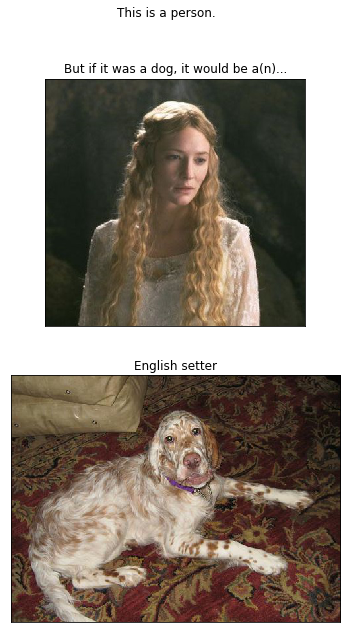

In [88]:

## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
run_app('images/galadriel.jpg')

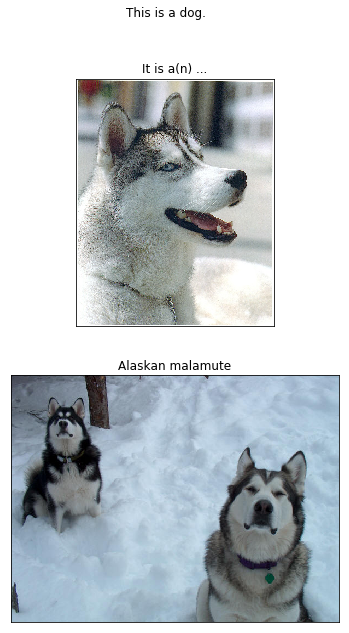

In [60]:
run_app('images/husky.jpg')

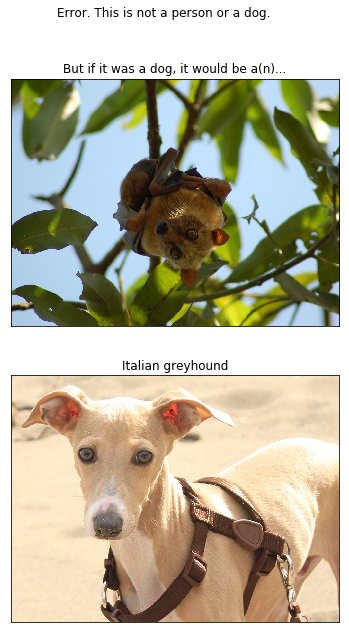

In [71]:
run_app('images/flying_fox.JPG')

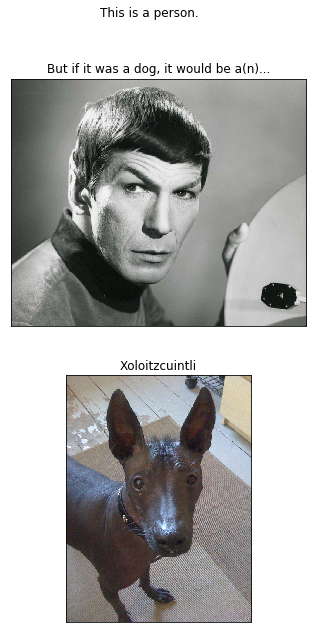

In [62]:
run_app('images/spock.jpg')

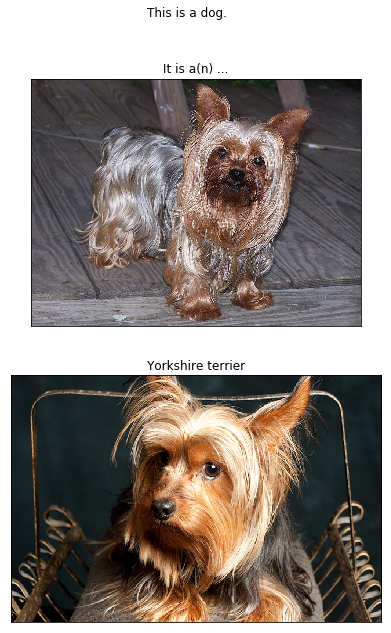

In [63]:
run_app('images/yorkie.jpg')

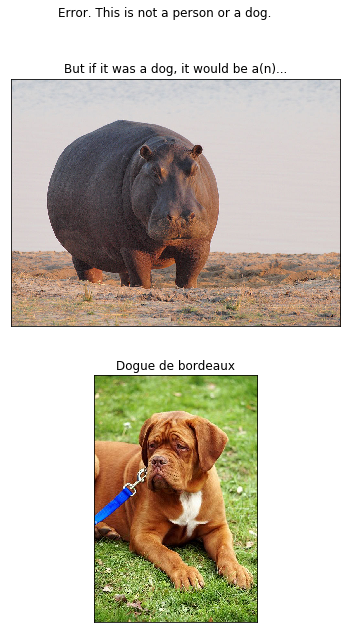

In [64]:
run_app('images/hippo.jpg')

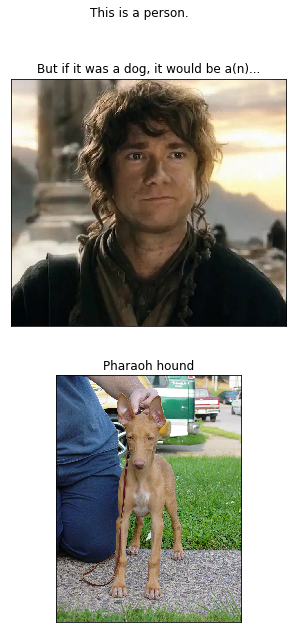

In [69]:
run_app('images/bilbo.jpg')

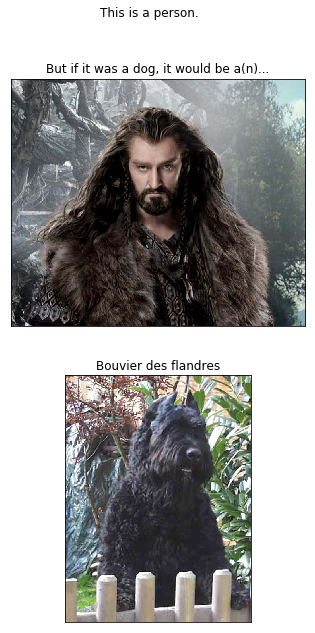

In [78]:
run_app('images/thorin.jpg')

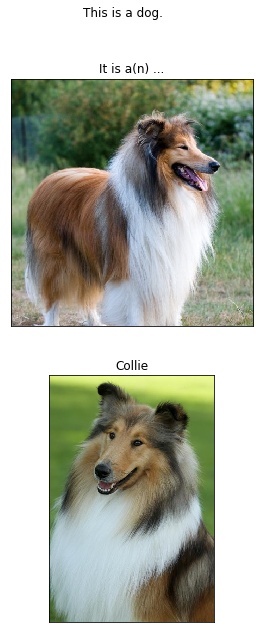

In [68]:
run_app('images/collie.jpg')

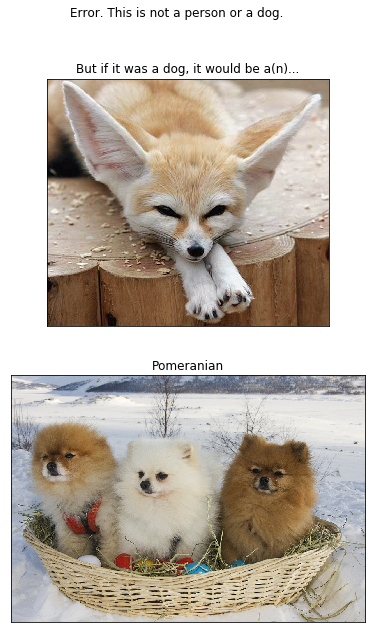

In [74]:
run_app('images/fox.jpg')